<a href="https://colab.research.google.com/github/kthur/kthur/blob/master/programming/241028_ai_essential/%5BAI_Essential%5D_PyTorch_%EB%8B%A4%EC%96%91%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A1%9C%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install JAEN -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 정형 데이터 생성
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'label': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
df

,feature1,feature2,label
0,1,5,0
1,2,4,1
2,3,3,0
3,4,2,1
4,5,1,0


In [ ]:
# Custom Dataset 클래스 정의
class DataFrameDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx] # idx번째 행 선택
        # features와 label을 분리하여 텐서로 변환
        features = torch.tensor(row[['feature1', 'feature2']].values, dtype=torch.float32)
        label = torch.tensor(row['label'], dtype=torch.long)
        return features, label

# DataLoader 생성
dataset = DataFrameDataset(df)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# 1개의 배치 가져오기
batch_data, batch_labels = next(iter(dataloader))
print(batch_data)
print(batch_labels)

tensor([[3., 3.],
        [4., 2.]])
tensor([0, 1])


In [ ]:
from torchvision import datasets, transforms

# 이미지 전처리 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 이미지 크기 변경 (128x128)
    transforms.ToTensor()          # Tensor로 변환
])

# torchvision 데이터셋 로드
dataset = datasets.CIFAR10(root='data', train=True, transform=transform, download=True)

# DataLoader 생성
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)

# 1개의 배치 가져오기
batch_image, batch_labels = next(iter(dataloader))
batch_image[0], batch_labels[0]

100%|██████████| 170M/170M [00:11<00:00, 14.7MB/s]


Extracting data/cifar-10-python.tar.gz to data


(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.4157, 0.4157, 0.4118,  ..., 0.9020, 0.9059, 0.9059],
          [0.4392, 0.4392, 0.4353,  ..., 0.9098, 0.9098, 0.9098],
          [0.4392, 0.4392, 0.4353,  ..., 0.9098, 0.9098, 0.9098]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.4196, 0.4196, 0.4196,  ..., 0.8078, 0.8118, 0.8118],
          [0.4471, 0.4471, 0.4471,  ..., 0.8157, 0.8157, 0.8157],
          [0.4471, 0.4471, 0.4471,  ..., 0.8157, 0.8157, 0.8157]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

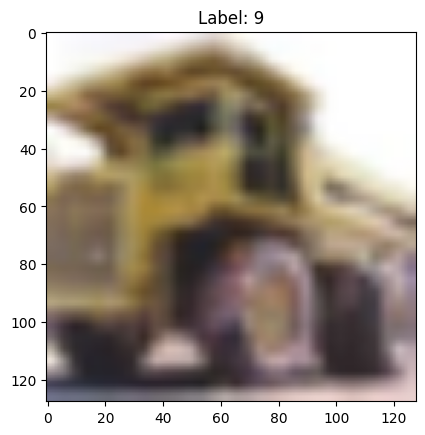

In [ ]:
# 첫 번째 이미지를 가져와 시각화
img = batch_image[0]  # 첫 번째 이미지를 가져옴
label = batch_labels[0]  # 첫 번째 이미지의 라벨

# 이미지를 [C, H, W] -> [H, W, C]로 변환
img = img.permute(1, 2, 0)

# 이미지 시각화
plt.imshow(img)
plt.title(f'Label: {label.item()}')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ["I love machine learning", "PyTorch is great", "Deep learning is a subset of machine learning"]
labels = [1, 0, 1]

# 텍스트 문서나 문장들을 각 단어의 빈도로 표현하여 기계 학습 모델에 입력할 수 있는 형태로 변환
vectorizer = CountVectorizer(stop_words='english') # 불용어 제거
vectorized_texts = vectorizer.fit_transform(texts).toarray()
vectorized_texts

# 벡터의 형태
print(vectorized_texts)

[[0 0 1 1 1 0 0]
 [0 1 0 0 0 1 0]
 [1 0 2 0 1 0 1]]


In [ ]:
# 어휘 사전 출력
print(vectorizer.get_feature_names_out())

['deep' 'great' 'learning' 'love' 'machine' 'pytorch' 'subset']


In [ ]:
# 어휘 사전 기반 단어 변환
inversed = vectorizer.inverse_transform(vectorized_texts)
print("역변환된 단어들:\n", inversed)

역변환된 단어들:
 [array(['learning', 'love', 'machine'], dtype='<U8'), array(['great', 'pytorch'], dtype='<U8'), array(['deep', 'learning', 'machine', 'subset'], dtype='<U8')]


In [ ]:
# Custom Dataset 클래스 정의
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text_vector = torch.tensor(self.texts[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text_vector, label

# DataLoader 생성
dataset = TextDataset(vectorized_texts, labels)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# 1개의 배치 가져오기
batch_data, batch_labels = next(iter(dataloader))
print(batch_data)
print(batch_labels)

tensor([[1., 0., 2., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 1., 0.]])
tensor([1, 0])


In [ ]:
import json

# 예시 JSON 데이터 로드
json_data = '''
[
    {"text": "PyTorch is great", "label": 0},
    {"text": "I love deep learning", "label": 1},
    {"text": "Transformers are powerful", "label": 1}
]
'''

data = json.loads(json_data)
data

[{'text': 'PyTorch is great', 'label': 0},
 {'text': 'I love deep learning', 'label': 1},
 {'text': 'Transformers are powerful', 'label': 1}]

In [ ]:
# Custom Dataset 클래스 정의
class JSONDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data[idx]['text']
        label = self.data[idx]['label']
        # 간단한 텍스트 벡터화 (예시로 단어 길이 사용)
        text_vector = torch.tensor([len(text.split())], dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)
        return text_vector, label

# DataLoader 생성
dataset = JSONDataset(data)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# 1개의 배치 가져오기
batch_data, batch_labels = next(iter(dataloader))
print(batch_data)
print(batch_labels)

tensor([[3.],
        [4.]])
tensor([1, 1])


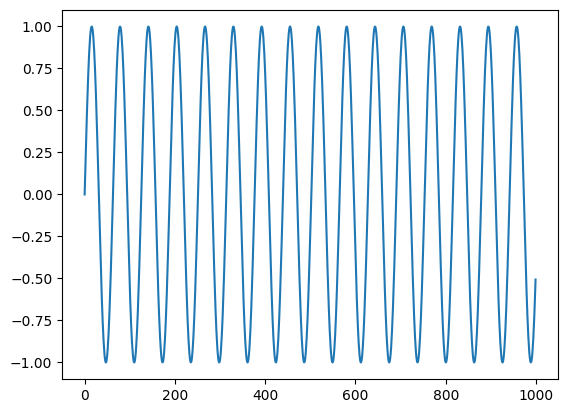

In [ ]:
# 예시 시계열 데이터 생성
time_series = np.sin(np.linspace(0, 100, 1000))  # 사인 곡선을 시계열 데이터로 사용
plt.plot(time_series)
plt.show()

In [ ]:
# Custom Dataset 클래스 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, series, seq_length):
        self.series = series
        self.seq_length = seq_length

    def __len__(self):
        return len(self.series) - self.seq_length

    def __getitem__(self, idx):
        x = self.series[idx:idx + self.seq_length]
        y = self.series[idx + self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# DataLoader 생성
seq_length = 3  # 시퀀스 길이
dataset = TimeSeriesDataset(time_series, seq_length)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

# 1개의 배치 가져오기
batch_data, batch_labels = next(iter(dataloader))
print(batch_data)
print(batch_labels)

tensor([[0.0000, 0.0999, 0.1989],
        [0.0999, 0.1989, 0.2958],
        [0.1989, 0.2958, 0.3898],
        [0.2958, 0.3898, 0.4799]])
tensor([0.2958, 0.3898, 0.4799, 0.5651])


In [ ]:
from JAEN import download_file
download_file("dataloader")
!unzip data.zip -d data

파일이 성공적으로 다운로드되었습니다: data.zip
절대 경로: /content/data.zip
상대 경로: data.zip
Archive:  data.zip
   creating: data/catvsdog/
   creating: data/catvsdog/test/
   creating: data/catvsdog/test/cat/
  inflating: data/catvsdog/test/cat/cat.5.jpg  
  inflating: data/catvsdog/test/cat/cat.6.jpg  
  inflating: data/catvsdog/test/cat/cat.7.jpg  
  inflating: data/catvsdog/test/cat/cat.8.jpg  
  inflating: data/catvsdog/test/cat/cat.9.jpg  
   creating: data/catvsdog/test/dog/
  inflating: data/catvsdog/test/dog/dog.5.jpg  
  inflating: data/catvsdog/test/dog/dog.6.jpg  
  inflating: data/catvsdog/test/dog/dog.7.jpg  
  inflating: data/catvsdog/test/dog/dog.8.jpg  
  inflating: data/catvsdog/test/dog/dog.9.jpg  
   creating: data/catvsdog/train/
   creating: data/catvsdog/train/cat/
  inflating: data/catvsdog/train/cat/cat.0.jpg  
  inflating: data/catvsdog/train/cat/cat.1.jpg  
  inflating: data/catvsdog/train/cat/cat.2.jpg  
  inflating: data/catvsdog/train/cat/cat.3.jpg  
  inflating: data/catvsdog/

In [ ]:
import os
from PIL import Image

# Custom Dataset 클래스 정의
class CatDogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        # 모든 이미지 파일과 해당 라벨(폴더 이름에 따라)을 저장
        self.image_paths = []
        self.labels = []

        for label, sub_dir in enumerate(['cat', 'dog']):  # 0: cat, 1: dog
            full_dir = os.path.join(root_dir, sub_dir)
            for img_name in os.listdir(full_dir):
                img_path = os.path.join(full_dir, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)

    def __len__(self):
        """데이터셋의 크기 반환"""
        return len(self.image_paths)

    def __getitem__(self, idx):
        """주어진 인덱스의 이미지와 라벨 반환"""
        img_path = self.image_paths[idx]
        image = Image.open(img_path)  # 이미지 로드
        label = self.labels[idx]      # 라벨 (0: cat, 1: dog)

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# 이미지 전처리 (크기 조정 및 텐서 변환)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 이미지 크기를 128x128로 변경
    transforms.ToTensor()           # 이미지를 텐서로 변환
])

# Custom Dataset을 사용하여 train 데이터셋을 로드
train_dataset = CatDogDataset(root_dir='data/catvsdog/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# 첫 번째 배치 확인 (예시)
batch_data, batch_labels = next(iter(train_loader))
print(batch_data)
print(batch_labels)

tensor([[[[0.8000, 0.8196, 0.8275,  ..., 0.9647, 0.9608, 0.9451],
          [0.8000, 0.8196, 0.8275,  ..., 0.9647, 0.9608, 0.9490],
          [0.8000, 0.8196, 0.8275,  ..., 0.9686, 0.9608, 0.9529],
          ...,
          [0.6196, 0.6235, 0.6314,  ..., 0.0118, 0.0118, 0.0078],
          [0.6078, 0.6118, 0.6196,  ..., 0.0118, 0.0118, 0.0118],
          [0.5961, 0.6039, 0.6157,  ..., 0.0078, 0.0078, 0.0078]],

         [[0.6471, 0.6667, 0.6745,  ..., 0.8118, 0.8000, 0.7882],
          [0.6471, 0.6667, 0.6745,  ..., 0.8196, 0.8039, 0.7961],
          [0.6471, 0.6667, 0.6745,  ..., 0.8235, 0.8118, 0.8000],
          ...,
          [0.4863, 0.4941, 0.4980,  ..., 0.0157, 0.0157, 0.0078],
          [0.4863, 0.4902, 0.4980,  ..., 0.0118, 0.0118, 0.0118],
          [0.4745, 0.4824, 0.4941,  ..., 0.0078, 0.0078, 0.0078]],

         [[0.3451, 0.3647, 0.3725,  ..., 0.4902, 0.4745, 0.4784],
          [0.3451, 0.3647, 0.3725,  ..., 0.5020, 0.4824, 0.4824],
          [0.3451, 0.3647, 0.3725,  ..., 0

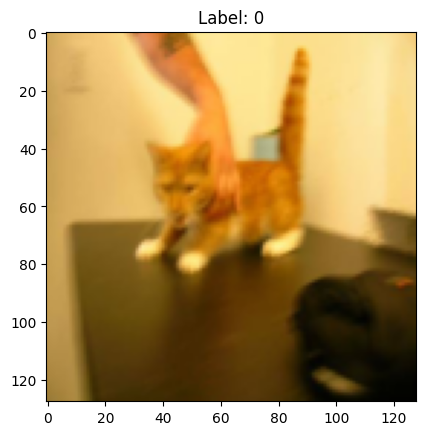

In [ ]:
# 첫 번째 이미지를 가져와 시각화
img = batch_data[0]  # 첫 번째 이미지를 가져옴
label = batch_data[0]  # 첫 번째 이미지의 라벨

# 이미지를 [C, H, W] -> [H, W, C]로 변환
img = img.permute(1, 2, 0)

# 이미지 시각화
plt.imshow(img)
plt.title(f'Label: {batch_labels.item()}')
plt.show()